<img src="http://i3.stat01.com/1/4577/45766688/afacdb/pivo-quot-zhigulevskoe-barnoe-quot.jpg" height="1000" width="530">


## С утра принял - весь день свободен!

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [63]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
data = pd.read_csv('C:/Users/Elizaveta/Desktop/DataCulture-master/liza/Bolotina_Elisaveta_recipeData.csv')
print('Размер выборки:', data.shape) 
data = data.drop (['BeerID','StyleID','UserId'], axis=1)
data = data.drop(['URL','Size(L)', 'Efficiency', 'MashThickness', 'SugarScale', 'BrewMethod', 'PitchRate','PrimaryTemp', 'PrimingMethod', 'PrimingAmount'], axis=1)
data.head()

Размер выборки: (73861, 23)


,Name,Style,OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity
0,Vanilla Cream Ale,Cream Ale,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038
1,Southern Tier Pumking clone,Holiday/Winter Special Spiced Beer,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070
2,Zombie Dust Clone - EXTRACT,American IPA,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN
3,Zombie Dust Clone - ALL GRAIN,American IPA,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN
4,Bakke Brygg Belgisk Blonde 50 l,Belgian Blond Ale,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050


## 1. Предобработка данных


In [65]:
data = data[~data.Style.isnull()]
def transformStyle(style):
    
    if style.find('IPA') > -1:
        style = 'IPA'
    elif style.find('Porter') > -1:
        style = 'Porter'
    elif style.find('Stout') > -1:
        style = 'Stout'
    elif style.find('Ale') > -1:
        style = 'Ale'
    elif style.find('Lager') > -1:
        style = 'Lager'
    elif style.find('Witbier') > -1:
        style = 'Witbier'
    elif style.find('Saison') > -1:
        style = 'Saison'
    else:
        style = 'Other'
    return style

# создаем новый столбец с закодированными значениями
data['Style_transformed'] = data.Style.apply(lambda x: transformStyle(x))


In [66]:
data['Style_transformed'].head()

0      Ale
1    Other
2      IPA
3      IPA
4      Ale
Name: Style_transformed, dtype: object

In [67]:
target_var = ['Style_transformed'] 
contin_var = ['OG','FG','ABV','IBU','Color','BoilSize','BoilGravity']
categor_var = ['BoilTime']


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73265 entries, 0 to 73860
Data columns (total 11 columns):
Name                 73264 non-null object
Style                73265 non-null object
OG                   73265 non-null float64
FG                   73265 non-null float64
ABV                  73265 non-null float64
IBU                  73265 non-null float64
Color                73265 non-null float64
BoilSize             73265 non-null float64
BoilTime             73265 non-null int64
BoilGravity          70517 non-null float64
Style_transformed    73265 non-null object
dtypes: float64(7), int64(1), object(3)
memory usage: 6.7+ MB


In [69]:
data.isnull().sum()

Name                    1
Style                   0
OG                      0
FG                      0
ABV                     0
IBU                     0
Color                   0
BoilSize                0
BoilTime                0
BoilGravity          2748
Style_transformed       0
dtype: int64

In [70]:
data.isnull().sum()/len(data)

Name                 0.000014
Style                0.000000
OG                   0.000000
FG                   0.000000
ABV                  0.000000
IBU                  0.000000
Color                0.000000
BoilSize             0.000000
BoilTime             0.000000
BoilGravity          0.037508
Style_transformed    0.000000
dtype: float64

## Категориальные переменные


In [71]:
data[categor_var].head()

,BoilTime
0,75
1,60
2,60
3,60
4,90


In [72]:
len(data['BoilTime'].unique())

75

In [73]:
frequency_encoding = dict(data['BoilTime'].value_counts()/len(data))
data['BoilTime'] = data['BoilTime'].map(frequency_encoding)

In [74]:
data_categor = data[categor_var]
data[categor_var].head()

,BoilTime
0,0.028868
1,0.748516
2,0.748516
3,0.748516
4,0.154535


In [75]:
data_categor.isnull().sum()

BoilTime    0
dtype: int64



## Целевая  переменная 


In [76]:
data_target = data[target_var]  
data_target.head()

,Style_transformed
0,Ale
1,Other
2,IPA
3,IPA
4,Ale


## Непрерывные  переменные


In [77]:
data_contin = data[contin_var]
data_contin.head()

,OG,FG,ABV,IBU,Color,BoilSize,BoilGravity
0,1.055,1.013,5.48,17.65,4.83,28.39,1.038
1,1.083,1.021,8.16,60.65,15.64,24.61,1.070
2,1.063,1.018,5.91,59.25,8.98,22.71,NaN
3,1.061,1.017,5.80,54.48,8.50,26.50,NaN
4,1.060,1.010,6.48,17.84,4.57,60.00,1.050


In [78]:
data_contin.isnull().sum()

OG                0
FG                0
ABV               0
IBU               0
Color             0
BoilSize          0
BoilGravity    2748
dtype: int64

In [79]:
data_contin['BoilGravity'] = data_contin['BoilGravity'].fillna(data_contin['BoilGravity'].median())

In [80]:
data_contin.head()

,OG,FG,ABV,IBU,Color,BoilSize,BoilGravity
0,1.055,1.013,5.48,17.65,4.83,28.39,1.038
1,1.083,1.021,8.16,60.65,15.64,24.61,1.070
2,1.063,1.018,5.91,59.25,8.98,22.71,1.047
3,1.061,1.017,5.80,54.48,8.50,26.50,1.047
4,1.060,1.010,6.48,17.84,4.57,60.00,1.050


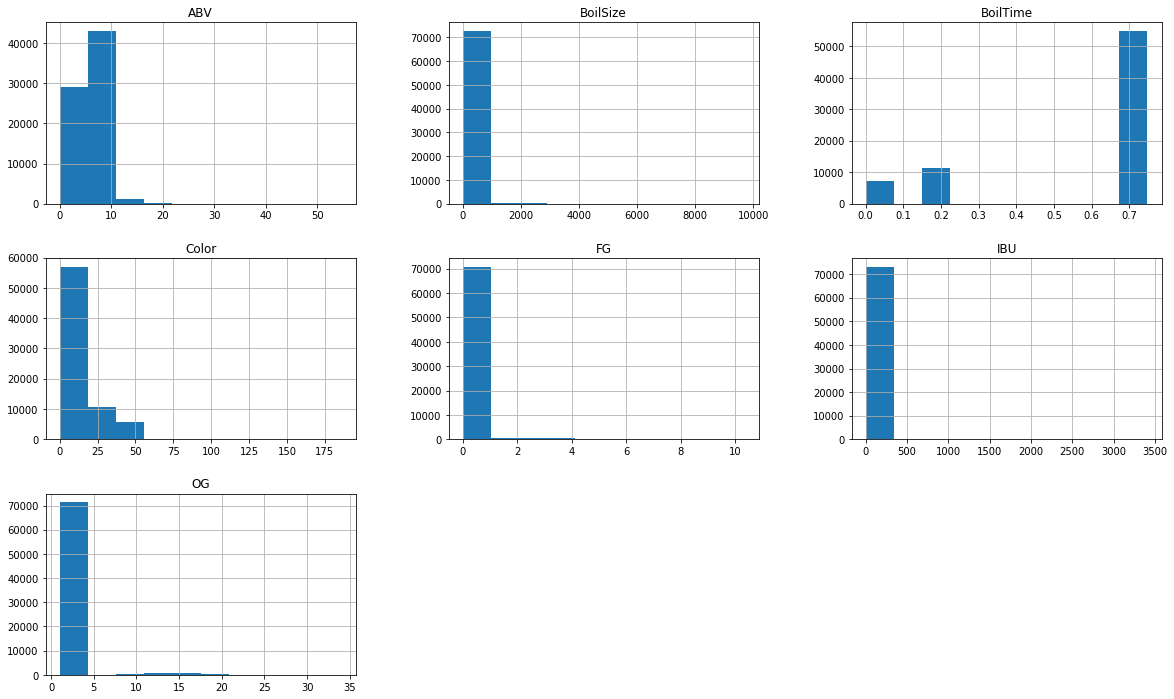

In [81]:
data.drop('BoilGravity',axis=1).hist(figsize=(20, 12));

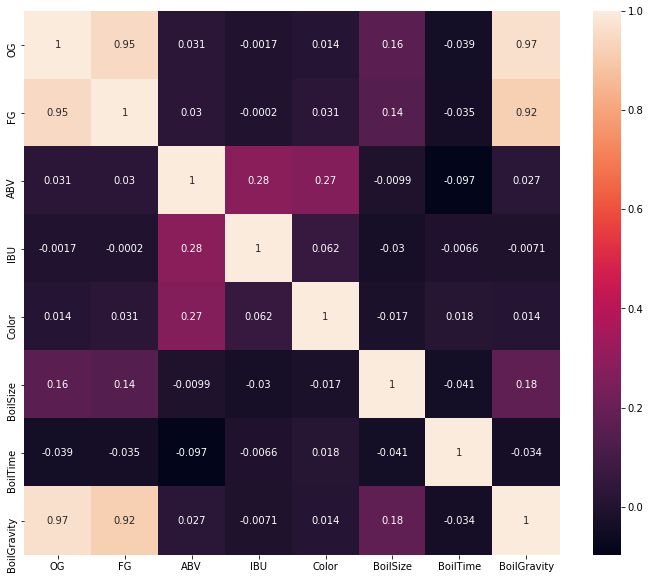

In [82]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True);

In [83]:
data_contin.head()

,OG,FG,ABV,IBU,Color,BoilSize,BoilGravity
0,1.055,1.013,5.48,17.65,4.83,28.39,1.038
1,1.083,1.021,8.16,60.65,15.64,24.61,1.070
2,1.063,1.018,5.91,59.25,8.98,22.71,1.047
3,1.061,1.017,5.80,54.48,8.50,26.50,1.047
4,1.060,1.010,6.48,17.84,4.57,60.00,1.050


In [84]:
data_contin.isnull().sum()

OG             0
FG             0
ABV            0
IBU            0
Color          0
BoilSize       0
BoilGravity    0
dtype: int64

In [85]:
data = pd.concat([data_target, data_contin, data_categor], axis=1)
data.head()

,Style_transformed,OG,FG,ABV,IBU,Color,BoilSize,BoilGravity,BoilTime
0,Ale,1.055,1.013,5.48,17.65,4.83,28.39,1.038,0.028868
1,Other,1.083,1.021,8.16,60.65,15.64,24.61,1.070,0.748516
2,IPA,1.063,1.018,5.91,59.25,8.98,22.71,1.047,0.748516
3,IPA,1.061,1.017,5.80,54.48,8.50,26.50,1.047,0.748516
4,Ale,1.060,1.010,6.48,17.84,4.57,60.00,1.050,0.154535


In [86]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size = 0.3)

y_train = data_train['Style_transformed']
y_test = data_test['Style_transformed']

X_train = data_train.drop(['Style_transformed'], axis=1)
X_test = data_test.drop(['Style_transformed'], axis=1)

## Метод ближайшего соседа 

In [87]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=1)
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [88]:
y_predicted = clf_knn.predict(X_test)
y_predicted

array(['IPA', 'Porter', 'IPA', ..., 'Other', 'Lager', 'Lager'],
      dtype=object)

In [89]:
from sklearn import metrics  

In [90]:
print(metrics.classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

        Ale       0.40      0.40      0.40      5714
        IPA       0.64      0.65      0.64      5120
      Lager       0.12      0.12      0.12      1213
      Other       0.45      0.44      0.45      6238
     Porter       0.26      0.27      0.27       778
     Saison       0.13      0.13      0.13       801
      Stout       0.62      0.60      0.61      1811
    Witbier       0.13      0.15      0.14       305

avg / total       0.45      0.45      0.45     21980



In [91]:
clf_knn = KNeighborsClassifier(n_neighbors=7)
clf_knn.fit(X_train, y_train)
y_predicted = clf_knn.predict(X_test)

In [92]:
print(metrics.classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

        Ale       0.43      0.51      0.47      5714
        IPA       0.67      0.76      0.71      5120
      Lager       0.22      0.07      0.11      1213
      Other       0.50      0.49      0.50      6238
     Porter       0.35      0.29      0.32       778
     Saison       0.19      0.04      0.07       801
      Stout       0.65      0.72      0.68      1811
    Witbier       0.18      0.06      0.09       305

avg / total       0.50      0.53      0.51     21980



In [93]:
y = clf_knn.predict(X_test)
y[:10]

array(['IPA', 'Stout', 'IPA', 'Ale', 'IPA', 'Other', 'Other', 'Other',
       'IPA', 'Stout'], dtype=object)

In [94]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y_labels_train = encoder.fit_transform(y_train)
y_labels_test = encoder.transform(y_test)

In [95]:
print(metrics.classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

        Ale       0.43      0.51      0.47      5714
        IPA       0.67      0.76      0.71      5120
      Lager       0.22      0.07      0.11      1213
      Other       0.50      0.49      0.50      6238
     Porter       0.35      0.29      0.32       778
     Saison       0.19      0.04      0.07       801
      Stout       0.65      0.72      0.68      1811
    Witbier       0.18      0.06      0.09       305

avg / total       0.50      0.53      0.51     21980



## Леса да деревья 

In [96]:
from sklearn.tree import DecisionTreeClassifier # подгрузили дерево

In [97]:
clf_tree = DecisionTreeClassifier()     # объявили дерево
clf_tree.fit(X_train, y_train)          # научили дерево
y_predicted = clf_tree.predict(X_test)  # предсказали метки класса
y_proba = clf_tree.predict_proba(X_test)

             precision    recall  f1-score   support

        Ale       0.41      0.41      0.41      5714
        IPA       0.65      0.64      0.64      5120
      Lager       0.14      0.15      0.14      1213
      Other       0.47      0.47      0.47      6238
     Porter       0.32      0.33      0.33       778
     Saison       0.21      0.21      0.21       801
      Stout       0.65      0.60      0.62      1811
    Witbier       0.13      0.14      0.14       305

avg / total       0.47      0.47      0.47     21980



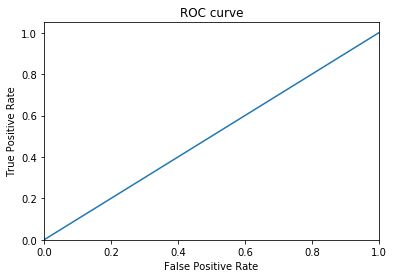

In [98]:
print(metrics.classification_report(y_test, y_predicted))

# Рисуем картиночку

plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()


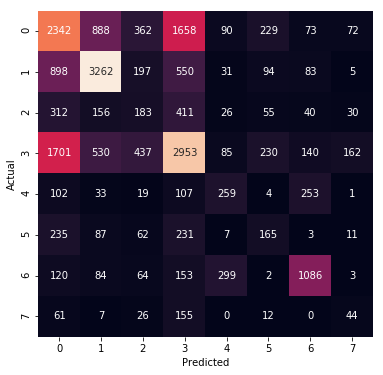

In [99]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
array = confusion_matrix(y_test, y_predicted)
df_cm = pd.DataFrame(array)
plt.figure(figsize = (6,6))
sns.heatmap(df_cm, annot=True, fmt='g', cbar=False)
plt.ylabel("Actual")
plt.xlabel("Predicted");

In [100]:
featureImportance = pd.DataFrame({"feature": data.drop('Style_transformed',axis=1).columns, 
                                  "importance": clf_tree.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance

,importance
feature,
IBU,0.252732
Color,0.247427
ABV,0.139189
BoilSize,0.100273
BoilGravity,0.093351
OG,0.076797
FG,0.063819
BoilTime,0.026412


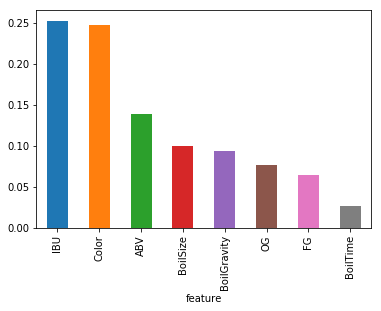

In [101]:
featureImportance["importance"].plot('bar')

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rfc = RandomForestClassifier(n_estimators=10) # число деревьев в лесе
rfc.fit(X_train, y_train)
y_predicted = rfc.predict(X_test)
y_proba = rfc.predict_proba(X_test)

             precision    recall  f1-score   support

        Ale       0.45      0.53      0.49      5714
        IPA       0.71      0.75      0.73      5120
      Lager       0.25      0.10      0.14      1213
      Other       0.54      0.56      0.55      6238
     Porter       0.35      0.30      0.32       778
     Saison       0.42      0.16      0.23       801
      Stout       0.68      0.72      0.69      1811
    Witbier       0.25      0.07      0.11       305

avg / total       0.54      0.55      0.54     21980



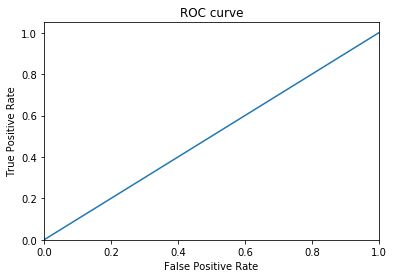

In [104]:

print(metrics.classification_report(y_test, y_predicted))



plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

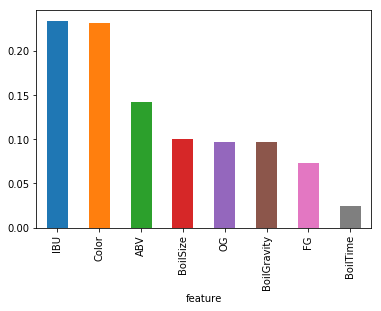

In [105]:
featureImportance = pd.DataFrame({"feature": data.drop('Style_transformed',axis=1).columns, 
                                  "importance": rfc.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar')

#  Подбор гиперпараметров

In [106]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':range(2, 25, 5), 'weights':['uniform', 'distance']}

knc = KNeighborsClassifier()

clf = GridSearchCV(knc, parameters)

clf.fit(X_train, y_train)
clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=22, p=2,
           weights='distance')

In [107]:

y_proba = clf.predict(X_test)
print(metrics.classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

        Ale       0.45      0.53      0.49      5714
        IPA       0.71      0.75      0.73      5120
      Lager       0.25      0.10      0.14      1213
      Other       0.54      0.56      0.55      6238
     Porter       0.35      0.30      0.32       778
     Saison       0.42      0.16      0.23       801
      Stout       0.68      0.72      0.69      1811
    Witbier       0.25      0.07      0.11       305

avg / total       0.54      0.55      0.54     21980



In [108]:
parameters = {
              'n_estimators': [10,15,20,25,30],           # число деревьев в лесу
              'min_samples_leaf': [1, 3, 5, 7, 10],        # минимальное число объектов в каждом листе
             }
# Можно перебирать и другие параметры 

rfc = RandomForestClassifier(random_state=42)   # random_state = 42 фиксируем для воспроизводимости результата

gcv = GridSearchCV(rfc, parameters, n_jobs= -1) # параметр n_jobs=-1 распаралеливает перебор на все ядра компухтера
gcv.fit(X_train, y_train)
gcv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [109]:
y_predicted = gcv.predict(X_test)
y_proba = gcv.predict_proba(X_test)

In [110]:
y_proba = clf.predict_proba(X_test)
print(metrics.classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

        Ale       0.51      0.50      0.51      5714
        IPA       0.72      0.79      0.75      5120
      Lager       0.47      0.05      0.08      1213
      Other       0.54      0.65      0.59      6238
     Porter       0.42      0.28      0.33       778
     Saison       0.54      0.19      0.29       801
      Stout       0.67      0.82      0.74      1811
    Witbier       0.41      0.04      0.08       305

avg / total       0.57      0.59      0.56     21980



# Логистическая регрессия

In [111]:
from sklearn.linear_model import LogisticRegression
# объявляем модель
logit = LogisticRegression()
# обучаем на тренировочной выборке
logit.fit(X_train, y_train)
# предсказываем вероятности
logit.predict_proba(X_test)
# предсказываем сами метки классов
logit.predict(X_test)

array(['IPA', 'Stout', 'IPA', ..., 'Ale', 'Other', 'Other'], dtype=object)

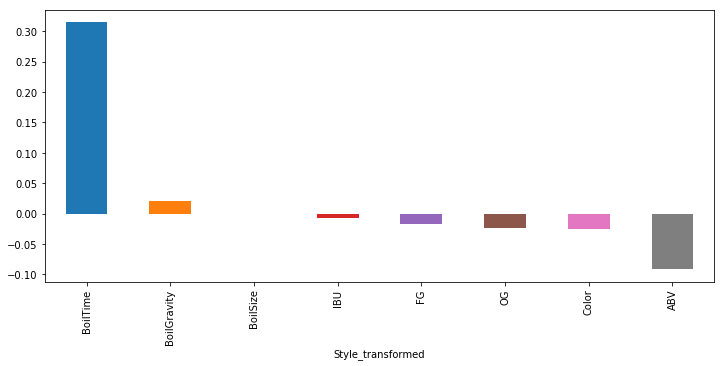

In [112]:
featureImportance = pd.DataFrame({"Style_transformed": X_train.columns, 
"importance": logit.coef_[0]})

featureImportance.set_index('Style_transformed', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].head(30).plot('bar', figsize=(12,5))
featureImportance["importance"].tail(30).plot('bar', figsize=(12,5))

# Результатыыыыы по пивасику 

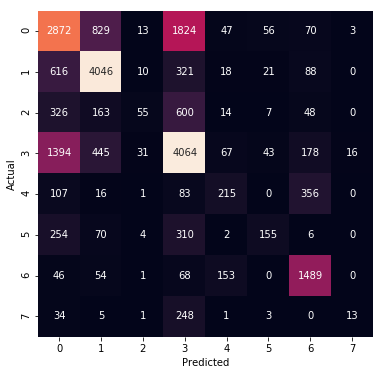

In [113]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
array = confusion_matrix(y_test, y_predicted)
df_cm = pd.DataFrame(array)
plt.figure(figsize = (6,6))
sns.heatmap(df_cm, annot=True, fmt='g', cbar=False)
plt.ylabel("Actual")
plt.xlabel("Predicted");


<img src='http://image3.thematicnews.com/uploads/images/00/00/41/2017/09/24/f0fceb8445.jpg'height="1000" width="530">


## Пейте ПИВО!!!